<a href="https://colab.research.google.com/github/ZgankMiha/Spsd21_Portfolio_MZ/blob/main/SDSPhD2021_Portfolio_MihaZgank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<strong>Portfolio exercise 1 - unsupervised ML - clustering</strong>
Monday, 2021-11-22

Packages for machine learning:
Scikit-learn: https://scikit-learn.org/stable/

Clustering is an unsupervised learning problem, it allows identifying natural grouping in data. It allows discovery of degrees of similarity between individual objects being clustered.


Imported packages:

In [1]:
import pandas as pd                                     #pandas
import numpy as np                                      #numpy
from matplotlib import pyplot as plt                    #matplotlib
from sklearn.cluster import AgglomerativeClustering     #Scikit-learn
from scipy.cluster.hierarchy import dendrogram, linkage #Scipy
from sklearn import metrics                             #Scikit-learn 
from sklearn.metrics import davies_bouldin_score        #Scikit-learn 

In [2]:
!wget https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv

--2021-12-07 10:52:26--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/value99.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187653 (183K) [text/plain]
Saving to: ‘value99.csv’

value99.csv         100%[===================>] 183.25K  --.-KB/s    in 0.03s   

2021-12-07 10:52:27 (6.00 MB/s) - ‘value99.csv’ saved [187653/187653]



In [3]:
val99 = pd.read_csv('value99.csv')
val99 = val99.replace('\.+', np.nan, regex=True)
val99.dropna(inplace=True)

val99.head(10)

val_set = val99.loc[:,'v7':'v61']
val_set.head()

#importance = {'v56':'arbejde','v57':'familie','v58':'venener','v59':'fritid', 'v60':'politik', 'v61':religion'}

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61
1,1,1,2,0,1,1,2,2,1,1
2,1,1,2,0,1,1,1,1,1,2
7,1,1,2,0,1,1,2,1,3,4
9,1,1,1,1,1,1,1,2,2,3
10,1,1,2,0,1,2,2,3,1,4


In [4]:
X = val_set.loc[:, 'v57':'v61']
X_1 = val_set.loc[:, 'v57':'v61']


not_cluster_set=val_set.loc[:,'v7':'v14']
linked = linkage(X, 'ward')


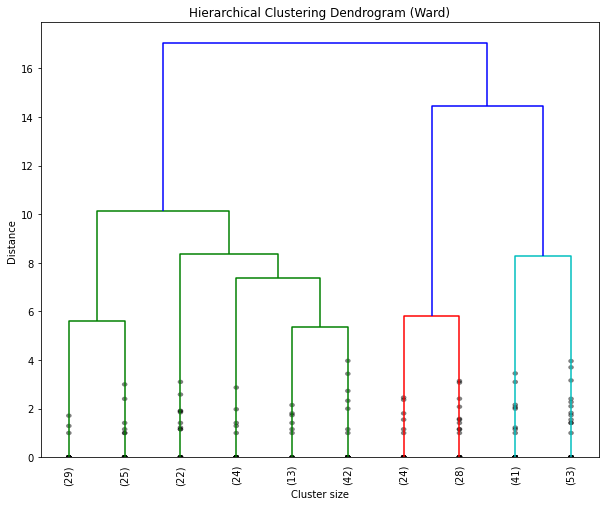

In [5]:
figure = plt.figure(figsize=(10, 8))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

In [6]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    val_set['cluster'+k] = labels

Cluster count- 2 |  db score- 1.8 |  ch score -  79.93 |  ss score -  0.21
Cluster count- 3 |  db score- 1.5 |  ch score -  84.67 |  ss score -  0.23
Cluster count- 4 |  db score- 1.52 |  ch score -  76.8 |  ss score -  0.22
Cluster count- 5 |  db score- 1.52 |  ch score -  70.46 |  ss score -  0.23
Cluster count- 6 |  db score- 1.48 |  ch score -  68.59 |  ss score -  0.24
Cluster count- 7 |  db score- 1.41 |  ch score -  66.83 |  ss score -  0.26
Cluster count- 8 |  db score- 1.43 |  ch score -  63.19 |  ss score -  0.27
Cluster count- 9 |  db score- 1.37 |  ch score -  60.66 |  ss score -  0.27
Cluster count- 10 |  db score- 1.36 |  ch score -  58.82 |  ss score -  0.28


**note:**

Davies Bouldin Score (db) → as low as possible

Calinski-Harabasz (ch) → as high as possible

Silhouette-score (ss) → is a -1 to +1 thing. 0 is bad while values closer to the edges are better.

In [ ]:
X_1=val_set[['cluster','v7',	'v9','v10','v14','v56','v57','v58','v59','v60','v61']]
X_1.head()

In [9]:
stuff=X_1.groupby(['cluster']).mean()
trans_stuff=stuff.T
ts=round(trans_stuff,2)
print(ts)
count=val_set.groupby(['cluster'])['v7'].count()
print(count)
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
        linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=2,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

KeyError: ignored

# <strong>Portfolio exercise 2 - supervised ML - categorisation and regression</strong>
Tuesday, 2021-11-23

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBRegressor

sns.set(style="darkgrid", color_codes=True)

In [ ]:
turnover = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/turnover.csv')
turnover.head()

In [ ]:
turn = pd.get_dummies(turnover)

In [ ]:
turn.describe()

In [ ]:
corr = turn.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap=cmap)

Checking how well the model predicted the `churn`

Predicting `churn` using a classification pipeline

In [ ]:
X = turn.loc[:, turn.columns!='churn']
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
y = turn.iloc[:, 6]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
true_churn = labelencoder_y.inverse_transform(y_test)
predicted_churn = labelencoder_y.inverse_transform(model.predict(X_test))

In [ ]:
df = pd.DataFrame({'true_churn': true_churn, 'predicted_churn': predicted_churn}) 

pd.crosstab(df.true_churn, df.predicted_churn)

In [ ]:
print(classification_report(true_churn,predicted_churn, labels=labelencoder_y.classes_))

In [ ]:
y_pred=model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="Blues",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Regression - Predicting the number of weekly average hours worked

In [ ]:
turn['average_weekly_hours'] = turn['average_montly_hours'] / 4.345
turn.head()

In [ ]:
y = turn['average_weekly_hours']

In [ ]:
# X = turn[['satisfaction', 'evaluation',	'number_of_projects', 'satisfaction',	'number_of_projects']]
# X.head()

In [ ]:
X = pd.concat([turn.iloc[:,:3],turn.iloc[:,4]],axis=1)
X.head()

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
model_ols = LinearRegression()
model_el = ElasticNet()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

In [ ]:
model_ols.fit(X_train, y_train)
model_el.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

In [ ]:
print('Model OLS' + ' ' + str(model_ols.score(X_test, y_test)))
print('Model EL' + ' ' + str(model_el.score(X_test, y_test)))
print('Model RF' + ' ' + str(model_rf.score(X_test, y_test)))
print('Model XGB' + ' ' + str(model_xgb.score(X_test, y_test)))

In [ ]:
print('Model OLS' + ' ' + str(model_ols.score(X_train, y_train)))
print('Model EL' + ' ' + str(model_el.score(X_train, y_train)))
print('Model RF' + ' ' + str(model_rf.score(X_train, y_train)))
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y_train)))

In [ ]:
y_pred_ols = model_ols.predict(X_test)
y_pred_el = model_el.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
sns.scatterplot(y_test, y_pred_ols)

In [ ]:
sns.scatterplot(y_test, y_pred_el)

In [ ]:
sns.scatterplot(y_test, y_pred_rf)

In [ ]:
sns.scatterplot(y_test, y_pred_xgb)

#**Portfolio exercise 3 - Geodata**
Wednesday, 2021-11-24

In [49]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)
!pip install adjustText # Adjusting text in maps

In [ ]:
!wget "https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip"
!unzip NUTS_RG_20M_2021_3035_LEVL_2.shp.zip

--2021-12-07 10:58:00--  https://github.com/CALDISS-AAU/sdsphd21/raw/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip [following]
--2021-12-07 10:58:00--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd21/master/datasets/NUTS_RG_20M_2021_3035_LEVL_2.shp.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159016 (155K) [application/zip]
Saving to: ‘NUTS_RG_20M_2021_3035_LEVL_2.shp.zip.1’

NUTS_RG_20M_2021_30 100%[===================>] 155.29K  --.-KB/s    in 0.03s   


In [ ]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [ ]:
eu = gdp.read_file("NUTS_RG_20M_2021_3035_LEVL_2.shp")
eu.head()

In [ ]:
excl_1 = ['AL','ME','MK','RS','TR']
excl_2 = ['FRY1','FRY2','FRY3','FRY4','FRY5','PT20','PT30','ES70','NO0B']

eu = eu[~eu.CNTR_CODE.isin(excl_1)]
eu = eu[~eu.NUTS_ID.isin(excl_2)]

eu.head()

In [ ]:
eu.plot(cmap='bone', column='CNTR_CODE',figsize=(8,8))

Data on poverty risk by EU NUTS_2 regions
(https://ec.europa.eu/eurostat/web/products-datasets/-/tgs00103)

In [ ]:
risk = pd.read_excel('/content/Portfolio Data/EU_data_Poverty_Risk.xlsx')
risk.head()

Merging the two dataframes

In [ ]:
eu_risk = eu.merge(risk, left_on='NUTS_NAME', right_on='NUTS_name', how='left', validate="one_to_one")
eu_risk.head()

In [ ]:
eu_risk.plot(column='risk', legend="True", figsize=(8,8), cmap='Greys')

Quite a lot of data seems to be missing from the map. However, some concluisons can already be made. Some parts in the South and East of EU are at higher risk of poverty. For example Sicily, and parts of Romania are particularly vunerable. Next map looks at more complete data of road accident deaths by NUTS_2 regions. This data is more complete, but size of the regions seems to contribute significantly to the number of victims.

In [ ]:
road = pd.read_excel('/content/Portfolio Data/EU_data_Road_Victims.xlsx')
road.head()

In [ ]:
eu_road = eu.merge(road, left_on='NUTS_ID', right_on='NUTS_co', how='left', validate="one_to_one")
eu_road.head()

In [ ]:
eu_road.plot(column='nbr_dead', legend="True", figsize=(8,8), cmap='Reds')

Seems there are some very bad drivers in Italy, numbers support the stereotypes in this case. Adding a basemap with the road network might be more informative.

In [ ]:
"Introduction to Network Analysis in Python

In [ ]:
eu_road = eu_road.to_crs(epsg=3857)

ax = eu_road.plot(column='nbr_dead', legend="True", alpha=0.6, figsize=(12,12), cmap='OrRd', edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


#**Portfolio exercise 4 - Network Analysis in Python**
Wednesday, 2021-11-24


In [ ]:
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools
import networkx as nx
import community.community_louvain as community_louvain

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show


# Default figure size
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

The data

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

In [ ]:
print(nx.info(G_friendship))
print(nx.info(G_advice))
print(nx.info(G_work))

Calcuating dimensional centralities

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

Calculating Assortiativity

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

Calculating Reciprocity

reciprocity for the Friendship network

In [ ]:
nx.overall_reciprocity(G_friendship)

reciprocity for the work network

In [ ]:
nx.overall_reciprocity(G_work)

the number here is quite different, and the reciprocity facotr is very high. it is possible to speculate that this is that the work network is based on very concrete and objective connections between th eindividuals. Work can be seen as a dialogue, two way collaboration where reciprocity is high between individuals. 

In [ ]:
nx.overall_reciprocity(G_advice)

We can observe a very low reciprocity factor, this could be due to the fact that advice is ussualy conencted to some hierarchical relationships between individuals in a work place. this means many times is is one-directional, which would suggest low reciprocity between individual nodes. In other workds, this hierarchical relationship causes the edges of the network to be very low in reciprocity.

Community detection - identifying communities in Friendship and Advice networks

In [ ]:
G_fr = nx.from_pandas_adjacency(mat_friendship, create_using=nx.Graph)
G_adv = nx.from_pandas_adjacency(mat_advice, create_using=nx.Graph)

In [ ]:
print(nx.info(G_fr))
print(nx.info(G_adv))

In [ ]:
com1 = community_louvain.best_partition(G_fr)
com2 = community_louvain.best_partition(G_adv)

In [ ]:
print(max(com1.values()))
print(max(com2.values()))

In [ ]:
nx.set_node_attributes(G_fr, com1, 'community')

g_plot = hv.Graph.from_networkx(G_fr, G_layout).opts(tools=['hover'],
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
nx.set_node_attributes(G_adv, com2, 'community')

g_plot = hv.Graph.from_networkx(G_adv, G_layout).opts(tools=['hover'],
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

#**Portfolio excercise 5 - Natural Language Processing**
Wednesday, 2021-11-24

Detecting fake Elon Tweets using surepvised ML

In [ ]:
!pip -q install eli5 #installing a great package for explaining ML models

In [ ]:
import pandas as pd 
import numpy as np
import eli5

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
elon = pd.read_csv('/content/Portfolio Data/find_elon.gz')
elon = elon.rename(columns={'0': 'tweet', '1':'real'})
elon.head(40)

# boolean values meaning: 1 - True, 0 - False

In [ ]:
X = elon['tweet'].values
y = elon['real'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [ ]:
model = LogisticRegression(max_iter=3000)

In [ ]:
model.fit(X_train_vec_1, y_train)

In [ ]:
X_test_vec_1 = vectorizer.transform(X_test)

In [ ]:
model.score(X_test_vec_1, y_test)

In [ ]:
y_pred = model.predict(X_test_vec_1)

In [ ]:
pd.crosstab(y_test, y_pred)

TF - IDF

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=3000)

In [ ]:
model.fit(X_train_vec_2, y_train)

In [ ]:
X_test_vec_2 = vectorizer.transform(X_test)

In [ ]:
model.score(X_test_vec_2, y_test)

In [ ]:
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['real','fake'], top=10)

In [ ]:
eli5.show_prediction(model, X_test[38], vec=vectorizer, target_names=['real','fake'])

In [ ]:
import spacy
nlp = spacy.load("en")

In [ ]:
doc = nlp(X_test[2])

In [ ]:
[(tok.text, tok.pos_) for tok in doc]